# Web Mining Final Project

## Author: Joshua Ryal

## Summarizing comments present on Reddit posts

### How comment scraping was accomplished

In [ ]:
#Create reddit instance
reddit = praw.Reddit(client_id=ID,
                     client_secret=SECRET,
                     user_agent='web_mining')
submission = reddit.submission(id='bg6q6s')

#Pickle the submission for later use
pickle.dump(submission, open('aww.pkl', 'wb'))

By default Reddit blocks unverified scripts from using their API. An application must be set up from your Reddit account to have access. The app provides you with a unique ID and secret that you can use to access the API.

When pulling a submission, you can provide the method with the full url or the unique identifier present.

### Processing post comments

In [ ]:
def scrape_comments(reddit, submission):
    sentences = []

    #Need to ignore MoreComments error for results to display
    for top_level_comment in submission.comments:
        if isinstance(top_level_comment, MoreComments):
            continue
        sentences.extend(sent_tokenize(top_level_comment.body))
    return sentences

Comments are pulled from the submission grabbed by the API. They are then tokenized by sentences and added to a list for processing.

In [ ]:
#Cluster score based on number of significant words ^2 and total words
def cluster_score(cluster):
    sig_words = len(cluster)
    total_words = cluster[-1] - cluster[0] + 1
    return sig_words ** 2 / total_words

def score_sentences(sentences, important_words, CLUSTER_THRESH=5):
    nltk.download('punkt')
    scores = []
    
    for sent in map(nltk.tokenize.word_tokenize, sentences):
        word_idx = []
        
        #Find the positions of all the important words in a sentence
        for word in important_words:
            if word in sent:
                word_idx.append(sent.index(word))
        word_idx.sort()
        
        #Build clusters based on threshold
        if len(word_idx) > 0:
            clusters = []
            current_cluster = [word_idx[0]]
            for idx in word_idx[1:]:
                #Check to see if the current index is close to previous index
                if idx - word_idx[-1] < CLUSTER_THRESH:
                    current_cluster.append(idx)
                    
                #If it's not, start a new cluster
                else:
                    clusters.append(current_cluster)
                    current_cluster = [idx]
            clusters.append(current_cluster)
            
            #Score clusters, keep track of the largest cluster score
            scores.append(max(map(cluster_score, clusters)))
        #If no important words are present, score 0
        else:
            scores.append(0)
    return scores

In [ ]:
#Use sentences and important words to return a summary of the length specified
def summarize(sentences, important_words, THRESHOLD=5, LENGTH=5):
    
    #Get score threshold based on average and standard deviation
    scores = score_sentences(sentences, important_words, THRESHOLD)
    
    sorted_scores = sorted(enumerate(scores), key=lambda x: x[1], reverse=True)[:LENGTH]
    sorted_indexes = sorted([s[0] for s in sorted_scores])
    
    #Return dictionary of summaries
    return {'top-n': ' '.join([sentences[i] for i in sorted_indexes])}

### Full summaries and word cloud visualizations

### r/diwhy

In [17]:
import praw
import reddit_modules
from info import ID, SECRET
import pickle

#Create reddit instance
reddit = praw.Reddit(client_id=ID,
                     client_secret=SECRET,
                     user_agent='web_mining')
#Grab pickled data
submission = pickle.load(open("diwhy.pkl", "rb"))

#Store content of comments
sentences = reddit_modules.scrape_comments(reddit, submission)
    
for f in sentences:
   print(f)

That chandelier when she uses the fucking hot glue gun on it...
I cannot understand it at all.
I love hating this video.
What is wrong with eating Spaghetti with only one fork?
Can’t use chopsticks?
Well then just use a for... dear god why?
!
Actually thought they were going to bend the end of the spoon do it would catch on the edge of the bowl instead of always sliding into my soup/cereal, which I thought was a great idea.
Was not expecting a chandelier.
Of course, it wouldn't be complete without some hot glue.
FFS.
***Thinking on her feet, Sarah crafts an eating utensil using nothing but a pair of eating utensils.
***
If anything, using chopsticks is easier than using forks like that...
The 2nd one made me die inside
Y’all can’t afford a picture frame but have a spare bench clamp just lying around?
Smh
I kinda dig the spoon light.
Seems like it would go well in one of those hipster upcycled train car craft beer and vegan cheese places.
The lamp might be kinda cute in a restaurant...?

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Josh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


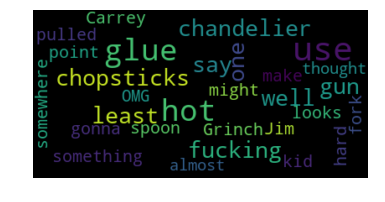

It’s not that hard to use chopsticks!! The spoon chandelier looks like something the Jim Carrey Grinch kid would make However they had to use hot glue somewhere..... I was gonna say to myself that at least there isn't a hot glue gun and then she fucking pulled it out At that point you might as well just use one fork Can't use chopsticks? And just when I thought there’d be no hot glue in this one... I was almost about to say, well, at least they didn't use the hot glue gun, but then the fuckING CHANDELIER OMG WHY


In [18]:
summary = reddit_modules.process_comments(sentences)
reddit_modules.generate_cloud(summary)
print(summary)

### r/gifs

In [15]:
import praw
import reddit_modules
from info import ID, SECRET
import pickle

#Create reddit instance
reddit = praw.Reddit(client_id=ID,
                     client_secret=SECRET,
                     user_agent='web_mining')
#Grab pickled data
submission = pickle.load(open("gifs.pkl", "rb"))

#Store content of comments
sentences = reddit_modules.scrape_comments(reddit, submission)
    
for f in sentences:
   print(f)

I had the opposite happen to me.
I was driving on a 2 lane highway in the US.
A red Jeep Grand Cherokee pulls up on me and follows closely.
After a bit, I slowed down to encourage them to pass.
That didn't work.
I tried speeding up and slowing down to encourage them to pass, and that didn't work either.
Finally, after 10-15 miles,  I just hit my turn signal and pull over.
That's when the lights come on.
So it turns out it's a cop in a Jeep, which was pretty rare for my area at the time (2005ish).
He comes up to the window, and asks why I pulled over.
I tell him it's because he was riding my ass, and that I thought he might finally pass me if I got out of the way.
The cop ran my plates, checked my license, then sent me on my way.
can you imagine the instant stomach drop when he flipped the lights on
Siren check works better than a brake check?
CHECK!!!!
Edit:spelling
I've been seeing a lot of tailgaters with 'Baby On Board' stickers lately.
My usual response to tailgaters is to just tak

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Josh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


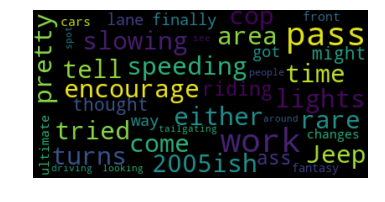

That didn't work. I tried speeding up and slowing down to encourage them to pass, and that didn't work either. That's when the lights come on. So it turns out it's a cop in a Jeep, which was pretty rare for my area at the time (2005ish). I tell him it's because he was riding my ass, and that I thought he might finally pass me if I got out of the way. There's no lane changes and cars in front. This is my ultimate fantasy when people are tailgating me. I'm driving around looking for a spot and I see him do that.


In [16]:
summary = reddit_modules.process_comments(sentences)
reddit_modules.generate_cloud(summary)
print(summary)

### r/aww

In [13]:
import praw
import reddit_modules
from info import ID, SECRET
import pickle

#Create reddit instance
reddit = praw.Reddit(client_id=ID,
                     client_secret=SECRET,
                     user_agent='web_mining')
#Grab pickled data
submission = pickle.load(open("aww.pkl", "rb"))

#Store content of comments
sentences = reddit_modules.scrape_comments(reddit, submission)
    
for f in sentences:
   print(f)

Leonardo da Vinci invents roller skates (1502, colorized)
Makin my way down town..
/r/gifsthatendtoosoon

I need the sauce
HAS SCIENCE GONE TOO FAR
This is amazing
r/partyparrot
That is so cool!
Was it hard to teach that?
I have a very smart Quaker but I could t even imagine where to begin with this kind of training!
Great job for teaching something so fun!
Imagine this with wind up cars... That bird would be zooming around...
Hate leg day, boys!
Blades of Glory 2
"Deja vu"
He was a sk8r boy
Beautiful birb
Indian Alexandrine ?
I would do leg day if it was this fun.
Just kidding.
I’d still be too lazy.
I love birds.
plot twist: the parrot is smarter than the president
Swiggity swooty
that is one cool bird...
Officer Byrd
Is that an Indian ring neck parrot
The calligraphy in the back is the Chinese character for heart, 心
Bet it would love a wing day...
Transformers: Birds in Disgue
#NEVER SKIP LEG DAY
Did those cars happen to come in a helicopter?
because I think I had the same toy
You c

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Josh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


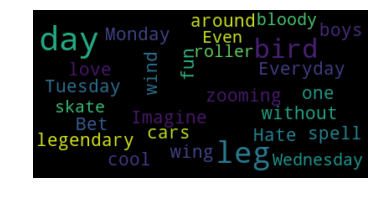

Imagine this with wind up cars... That bird would be zooming around... Hate leg day, boys! I would do leg day if it was this fun. that is one cool bird... Bet it would love a wing day... You can't spell legendary without leg day. Everyday is leg day, Monday, Tuesday, Wednesday Even a bloody bird can roller skate while I can't.


In [14]:
summary = reddit_modules.process_comments(sentences)
reddit_modules.generate_cloud(summary)
print(summary)